In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

In [8]:
#한글 글씨체 패키지
import matplotlib as mpl
import matplotlib.font_manager as fm
[f.name for f in fm.fontManager.ttflist]
plt.rc('font', family ='Malgun Gothic')
mpl.rcParams['axes.unicode_minus'] = False

### i-scream_data, Tsherpa_data, total_data 파일 경로 설정 필요

In [3]:
ice = pd.read_excel("../user/i-scream_data.xlsx")
tsel = pd.read_excel("../user/Tsherpa_data.xlsx")
total = pd.read_excel("../user/total_data.xlsx")

In [4]:
total

,title,category,time,price,D_price,review_c,star_m,company
0,"생각을 꺼내는 교육, 이제는 IB 시대",학습지도,15,50000,50000,112,4.955357,I
1,"미래인재의 역량을 키운다, 미래교육 20분",자기계발,30,85000,75000,101,4.930693,I
2,KOICA와 함께하는 세계시민교육,교과지도,30,85000,65000,30,4.900000,I
3,정재승의 인간수업,자기계발,30,85000,85000,15,5.000000,I
4,알면 편한 심리학 with 유미의 세포들,자기계발,30,85000,75000,420,4.942857,I
...,...,...,...,...,...,...,...,...
423,수업을 살리는 미술 레시피,교과지도,30,70000,70000,37,4.837838,T
424,수업을 살리는 꿀팁 레시피,교과지도,30,70000,70000,43,4.883721,T
425,나만의 여행책 만들기,자기계발,30,70000,70000,38,4.605263,T
426,수업을 살리는 놀이 레시피,교과지도,30,70000,70000,70,4.657143,T


In [5]:
# 가설 1 검증
corr = total[['star_m', 'review_c', 'price', 'time','D_price']].corr(method='pearson')
print("total Data - Pearson Correlation:")
print(corr)

total Data - Pearson Correlation:
            star_m  review_c     price      time   D_price
star_m    1.000000  0.091526  0.109742  0.056842  0.060854
review_c  0.091526  1.000000  0.084023  0.055233  0.059056
price     0.109742  0.084023  1.000000  0.971740  0.897236
time      0.056842  0.055233  0.971740  1.000000  0.895586
D_price   0.060854  0.059056  0.897236  0.895586  1.000000


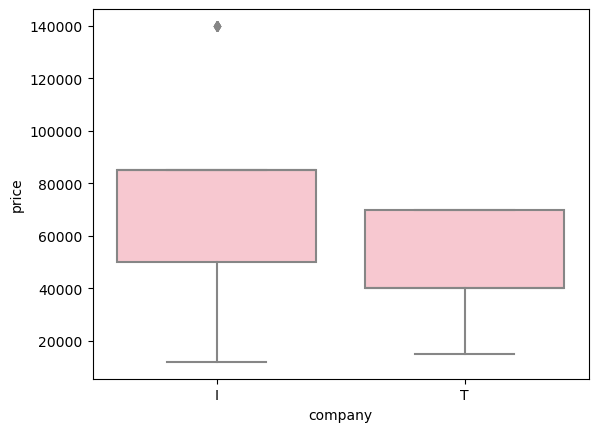

In [6]:
# 정가 가격 비교
box = sns.boxplot(data=total, x='company', y='price', color='pink')

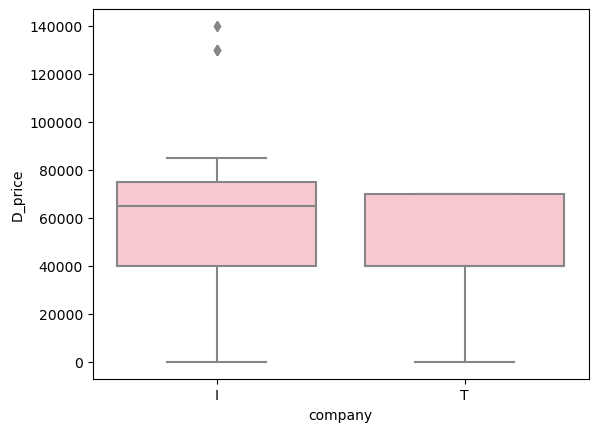

In [7]:
# 현재가 가격 비교
box = sns.boxplot(data=total, x='company', y='D_price', color='pink')

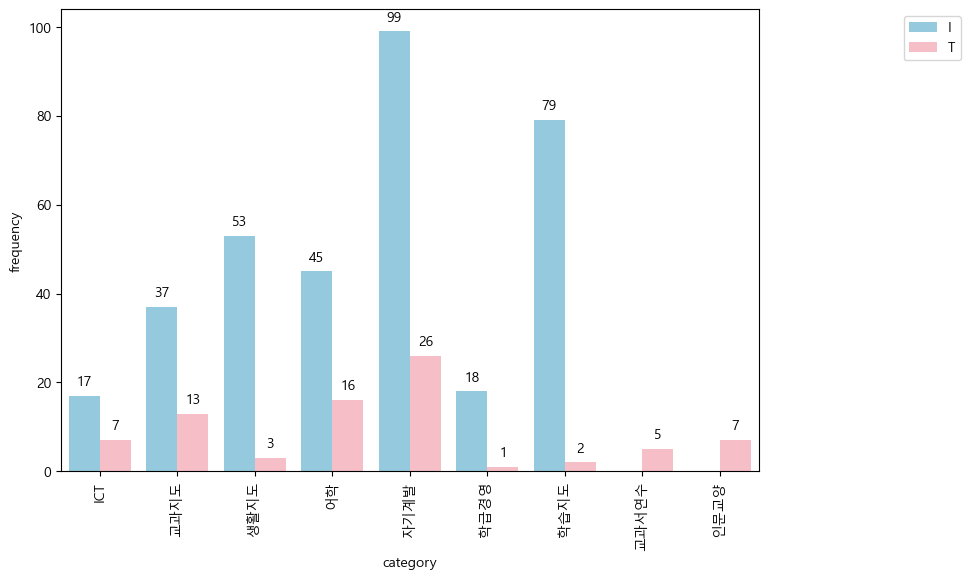

In [51]:

# 'I'와 'T' 회사의 카테고리별 빈도수 계산
total_2 = total[total['company'].isin(['I', 'T'])].groupby(['company', 'category']).size().reset_index(name='frequency')

# 색상 설정
colors = {'I': 'skyblue', 'T': 'lightpink'}

plt.figure(figsize=(9, 6))
# 바 플롯 생성
barplot = sns.barplot(data=total_2, x='category', y='frequency', hue='company', palette=colors)

# 막대에 주석 추가
for p in barplot.patches:
    height = p.get_height()
    if not pd.isna(height):  # Only annotate if height is not NaN
        barplot.annotate(f'{int(height)}', 
                         (p.get_x() + p.get_width() / 2., height),
                         ha='center', va='center', 
                         xytext=(0, 10), 
                         textcoords='offset points')

plt.legend(bbox_to_anchor=(1.3, 1.0), loc="upper right")        
plt.xticks(rotation=90)
plt.show()


In [52]:
# i-scream의 인기 순위를 추출합니다.
# review가 200개 이상이고, 회사는 i-scream인 데이터를 추출합니다.
itop = total[(total['review_c'] >= 200) & (total['company'] == 'I')]
itop = itop.sort_values(by='review_c', ascending=False)

# t-sel의 인기 순위를 추출합니다.
# review가 50개 이상이고, 회사는 t-sel인 데이터를 추출합니다.
ttop = total[(total['review_c'] >= 50) & (total['company'] == 'T')]
ttop = ttop.sort_values(by='review_c', ascending=False)

In [53]:
# i-scream의 인기 차트에서 카테고리별 boxplot을 그립니다.
itop2= itop.groupby(['company', 'category']).size().reset_index(name='frequency')

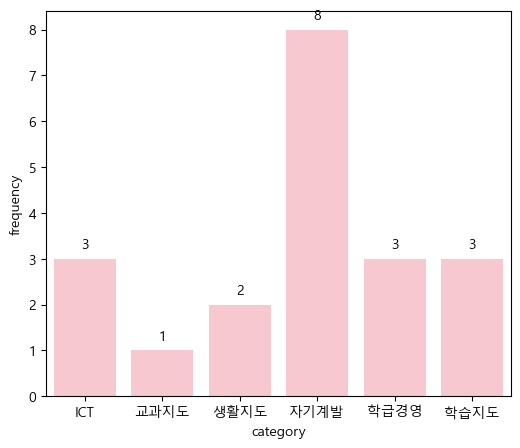

In [54]:
plt.figure(figsize=(6,5))
barplot = sns.barplot(data=itop2, x='category', y='frequency', color='pink')

for p in barplot.patches:
    height = p.get_height()
    barplot.annotate(f'{int(height)}', 
                     (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='center', 
                     xytext=(0, 10), 
                     textcoords='offset points')

In [55]:
# t-sel의 인기 차트에서 카테고리별 boxplot을 그립니다.
ttop2= ttop.groupby(['company', 'category']).size().reset_index(name='frequency')

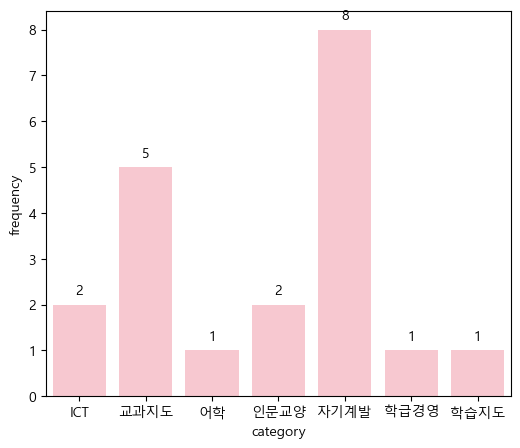

In [56]:
plt.figure(figsize=(6,5))
barplot = sns.barplot(data=ttop2, x='category', y='frequency', color='pink')

for p in barplot.patches:
    height = p.get_height()
    barplot.annotate(f'{int(height)}', 
                     (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='center', 
                     xytext=(0, 10), 
                     textcoords='offset points')

In [57]:
# 명사만 추출하기
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [58]:
def extract_nouns(text):
    tokens = word_tokenize(text)  
    tagged = pos_tag(tokens)  
    nouns = [word for word, pos in tagged if pos in ['NN', 'NNP', 'NNG', 'NNB', 'NNBC']]  
    return nouns

In [59]:
#i-cream의 자기계발 카테고리 워드 클라우드
Itop = itop[(itop['category'] == '자기계발')]

#static 파일 안에 있는 NOtoSanskr-Regular.ttf 경로 복사 해주세요
font_path = "../user/Noto_Sans_KR/static/NotoSansKR-Regular.ttf"

In [60]:
Itop['nouns'] = Itop['title'].apply(lambda x: extract_nouns(x))

C:\Users\user\AppData\Local\Temp\ipykernel_22360\977006479.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Itop['nouns'] = Itop['title'].apply(lambda x: extract_nouns(x))


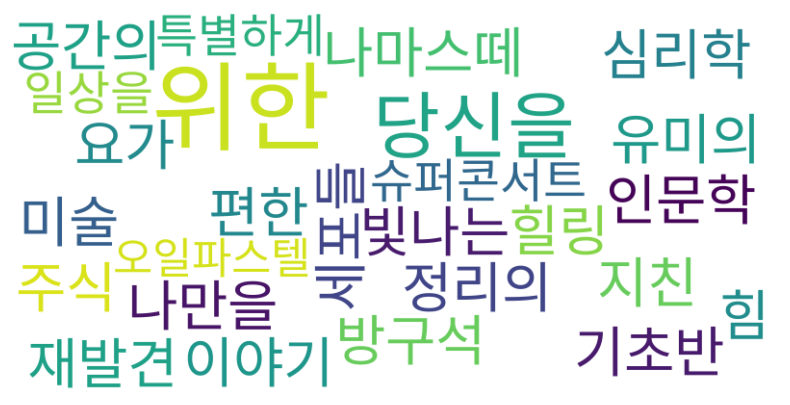

In [61]:
ic = ' '.join(Itop['nouns'].explode().dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate(ic)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.show()

In [62]:
#tsel의 자기계발 카테고리 워드 클라우드
Ttop = ttop[(ttop['category'] == '자기계발')]
Ttop['nouns'] = ttop['title'].apply(lambda x: extract_nouns(x))

C:\Users\user\AppData\Local\Temp\ipykernel_22360\70414249.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ttop['nouns'] = ttop['title'].apply(lambda x: extract_nouns(x))


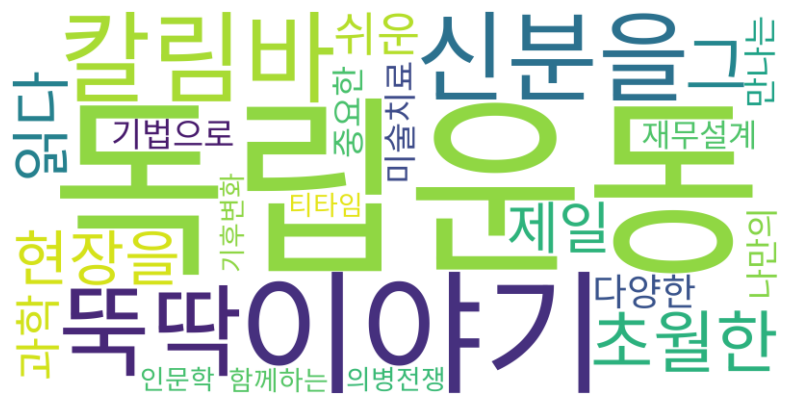

In [63]:
ts = ' '.join(Ttop['nouns'].explode().dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate(ts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.show()